### Problem statement (Term Deposit Sale)

<b>Goal:</b>

Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

<b>Resources Available:</b>

The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

<b>Context:</b>

Deliverable – 1 (Exploratory data quality report reflecting the following)
1. Univariate analysis (12 marks)
a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.
2. Multivariate analysis (8 marks)
a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

Deliverable – 2 (Prepare the data for analytics) 
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

Deliverable – 3 (create the ensemble model)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)
2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)
Proprietary content. ©Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

<b>Attribute Information:</b>

Input variables:
Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account

Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*

Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaign

Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

In [1]:
# import the necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
import pydotplus
import graphviz

### Deliverable 1

In [2]:
class understanding_data:
    
    def __init__(self, raw_df):
        self.raw_df = raw_df
        self.raw_df_grouped = raw_df.groupby("Target")
        self.class_name_no = "no"
        self.class_name_yes = "yes"
        self.raw_df_grouped_no = self.raw_df_grouped.get_group(self.class_name_no)
        self.raw_df_grouped_yes = self.raw_df_grouped.get_group(self.class_name_yes)

    def plot_histogram_continuous(self, feature_name, bin_size):
        plt.figure()
        plt.hist(self.raw_df_grouped_no[feature_name], bins=bin_size, label=self.class_name_no)
        plt.hist(self.raw_df_grouped_yes[feature_name], bins=bin_size, label=self.class_name_yes)
        plt.legend()
        plt.title("Feature Histogram - "+feature_name)
        plt.xlabel("Feature values")
        plt.ylabel("Count")

    def plot_histogram_categorical(self, feature_name):
        feature_df = pd.DataFrame()
        feature_df["no"] = self.raw_df_grouped_no[feature_name].value_counts()
        feature_df["yes"] = self.raw_df_grouped_yes[feature_name].value_counts()
        
        feature_df.plot(kind='bar')
        plt.title("Feature Histogram - "+feature_name)
        plt.ylabel("Count")
        plt.xlabel("Feature unique values")
        plt.tight_layout()
    
    

### Read csv and get grouped df based on class
raw_df = pd.read_csv('bank-full.csv')

In [3]:
data_analysis_obj = understanding_data(raw_df)

In [4]:
raw_df.shape

(45211, 17)

In [5]:
raw_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [6]:
# univariant Analysis
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
raw_df.groupby('Target').size()

Target
no     39922
yes     5289
dtype: int64

In [8]:
# replace yes=1 & no=0 in Target column
raw_df.replace({'Target':{'no':0,'yes':1}}, inplace=True)
raw_df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  Target  
0  unknown    5   may       261         1     -1         0  unknown       0  
1  unknown    5   may       151         1     -1         0  unknown       0  
2  unknown    5   may        76         1     -1         0  unknown       0  
3  unknown    5   may        92         1     -1         0  unknown       0  
4  unknown    5   may       198         1     -1         0  unknown       0

In [9]:
#convert categorical variable categories

for feature in raw_df.columns: # Loop through all columns in the dataframe
    if raw_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        raw_df[feature] = pd.Categorical(raw_df[feature])# Replace strings with an integer
raw_df.head(10)

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome  Target  
0  unknown    5   may       261         1     -1         0  unknown       0  
1  unknown    5   may       151         1     -1         0  unknown       0  
2  unknown    5   may        76         1     -1         0  unknown       0  
3  unknown    5   may        92         1     -1         0  unknown       0  
4  unknown    5   may       198         1     -1         0  unknown       0  
5  unknown    5   may       139         1     -1         0  unknown       0  
6  unknown    5   may       217         1     -1         0  unknown       0  
7  unknown    5   may       380         1     -1         0  unknown       0  
8  unknown    5   may        50         1     -1         0  unknown       0  
9  unknown    5   may        55         1     -1         0  unknown       0

In [10]:
raw_df.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target          int64
dtype: object

In [11]:
raw_df.isnull().values.any() # check for nulls

False

In [12]:
print(raw_df['job'].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


In [13]:
raw_df.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
Target       2.383480
dtype: float64

In [14]:
raw_df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [15]:
raw_df.describe().T # describe the data

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   
Target    45211.0     0.116985     0.321406     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0  
Target         1.0

In [16]:
raw_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

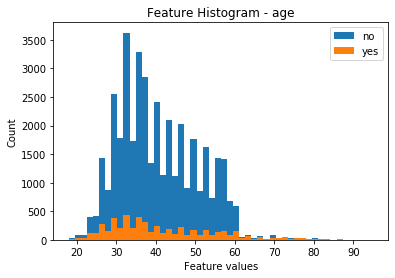

In [17]:
#Univariant Analysis
### Feature 1 - AGE
data_analysis_obj.plot_histogram_continuous("age", 50)

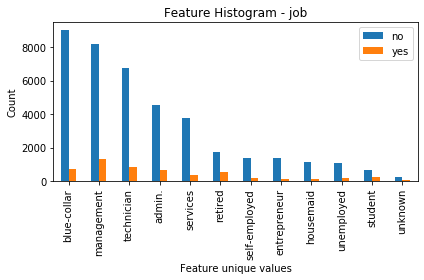

In [18]:
### Feature 2 - JOB
data_analysis_obj.plot_histogram_categorical("job")

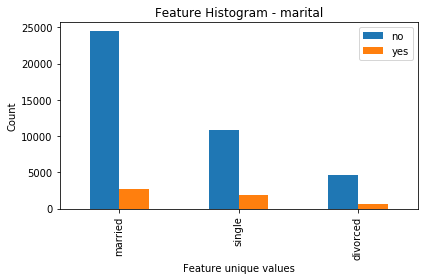

In [19]:
### Feature 3 - MARITAL
data_analysis_obj.plot_histogram_categorical("marital")

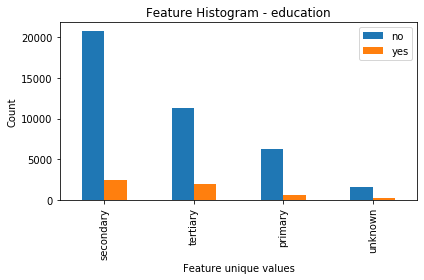

In [20]:
### Feature 4 - EDUCATION
data_analysis_obj.plot_histogram_categorical("education")

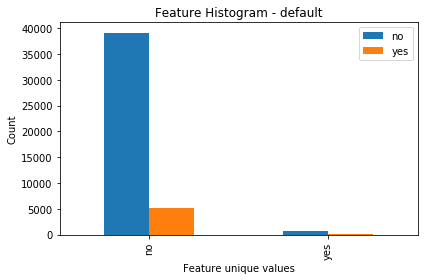

In [21]:
### Feature 5 - DEFAULT
data_analysis_obj.plot_histogram_categorical("default")

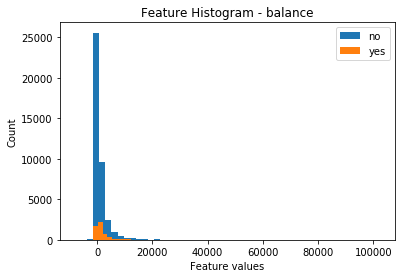

In [22]:
### Feature 6 - Balance
data_analysis_obj.plot_histogram_continuous("balance", 50)

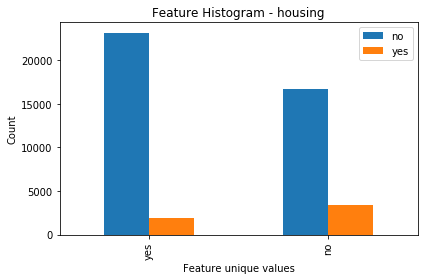

In [23]:
### Feature 7 - HOUSING
data_analysis_obj.plot_histogram_categorical("housing")

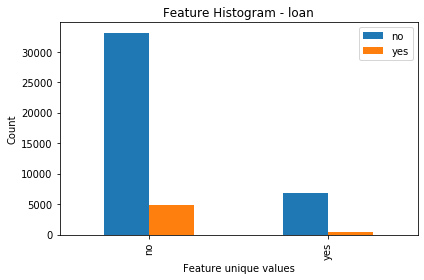

In [24]:
### Feature 8 - LOAN
data_analysis_obj.plot_histogram_categorical("loan")

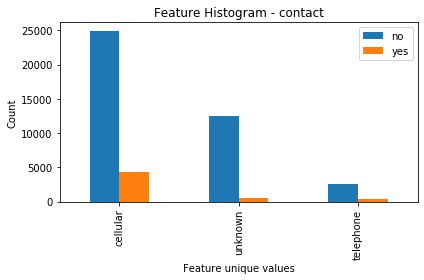

In [25]:
### Feature 9 - CONTACT
data_analysis_obj.plot_histogram_categorical("contact")

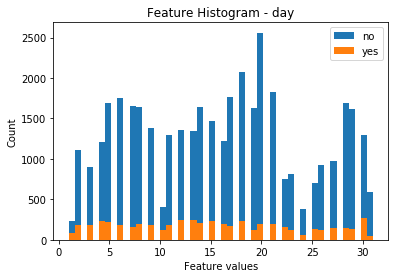

In [26]:
### Feature 10 - DAY
data_analysis_obj.plot_histogram_continuous("day", 50)

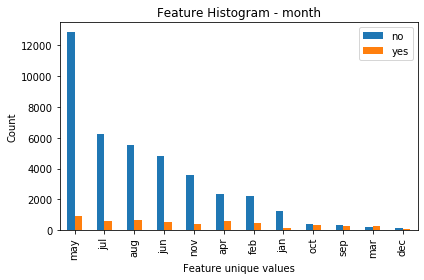

In [27]:
### Feature 11 - MONTH
data_analysis_obj.plot_histogram_categorical("month")

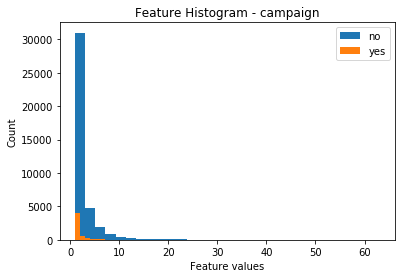

In [28]:
### Feature 12 - CAMPAIGN
data_analysis_obj.plot_histogram_continuous("campaign", 30)

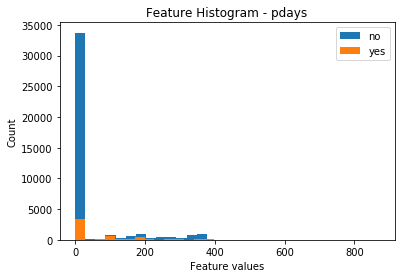

In [29]:
### Feature 13 - PDAYS
data_analysis_obj.plot_histogram_continuous("pdays", 30)

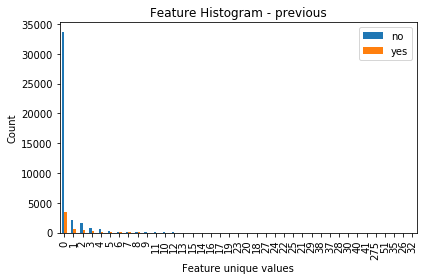

In [30]:
### Feature 14 - PREVIOUS
data_analysis_obj.plot_histogram_categorical("previous")

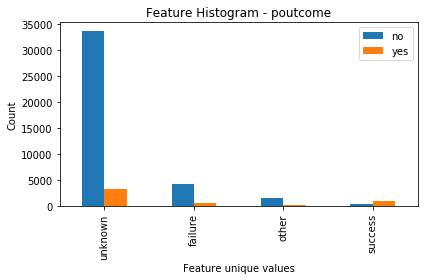

In [31]:
### Feature 15 - POUTCOME
data_analysis_obj.plot_histogram_categorical("poutcome")

Based upon the histograms pdays & default can be dropped

In [32]:
raw_df.drop(['pdays','default'], axis=1, inplace=True)

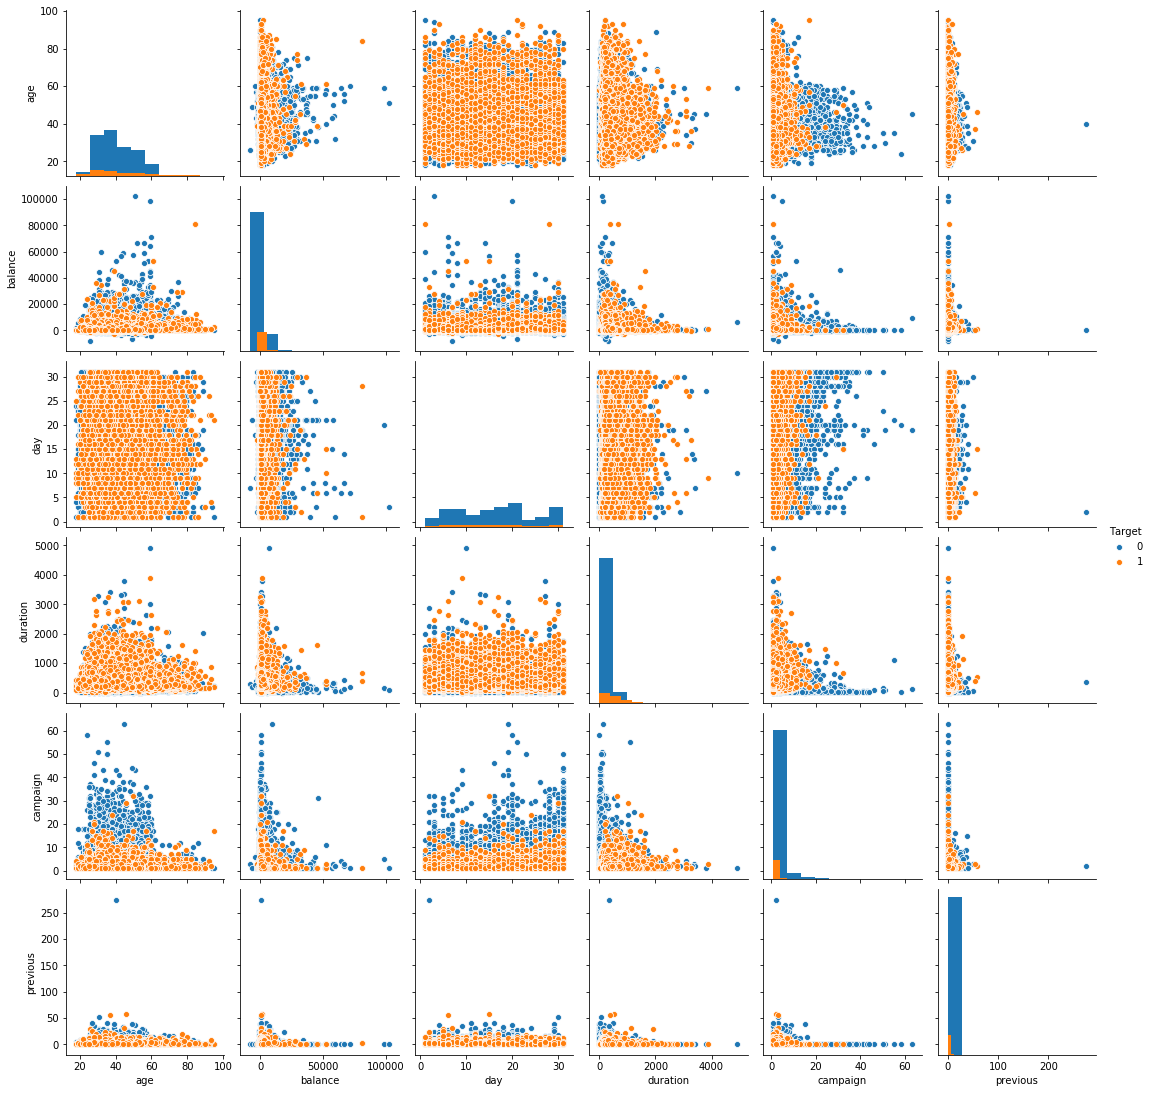

In [33]:
sns.pairplot(raw_df, hue='Target', diag_kind='hist')

In [34]:
pd.crosstab(raw_df['Target'],[raw_df['job'],raw_df['housing']], rownames=['Target'], colnames=['job','housing'])

job     admin.       blue-collar       entrepreneur      housemaid       \
housing     no   yes          no   yes           no  yes        no  yes   
Target                                                                    
0         1645  2895        2411  6613          548  816       757  374   
1          344   287         273   435           70   53        85   24   

job     management        ... services       student      technician        \
housing         no   yes  ...       no   yes      no  yes         no   yes   
Target                    ...                                                
0             3910  4247  ...     1204  2581     442  227       2978  3779   
1              870   431  ...      184   185     247   22        504   336   

job     unemployed      unknown      
housing         no  yes      no yes  
Target                               
0              598  503     230  24  
1              162   40      32   2  

[2 rows x 24 columns]

In [38]:
oneHotCols=["job","marital","education","housing","loan","contact","day","month","poutcome"]
raw_df=pd.get_dummies(raw_df, columns=oneHotCols, drop_first=True)

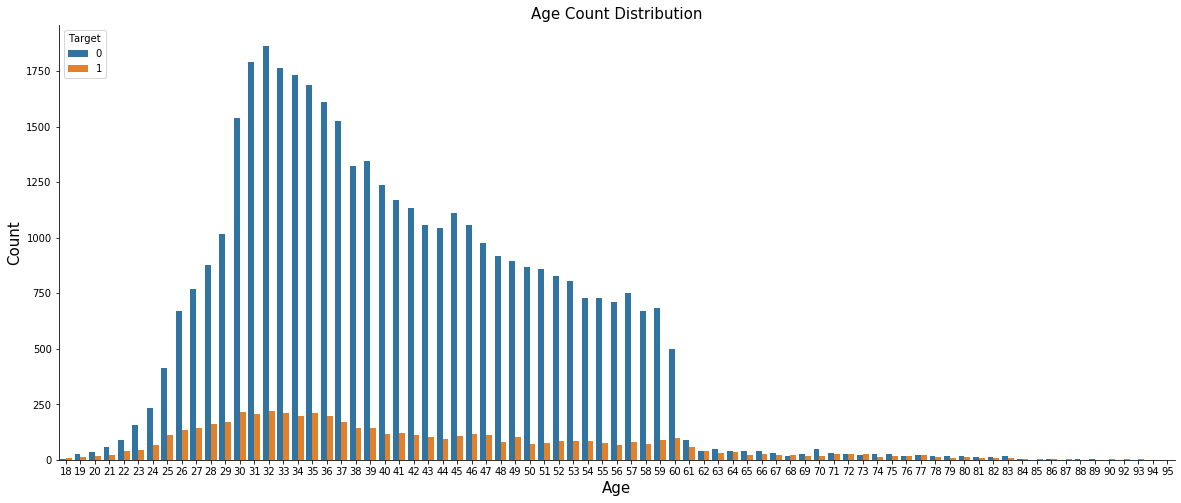

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(raw_df['age'], hue=raw_df['Target'])
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()
# sns.countplot(data['age'], hue=data['Target'])

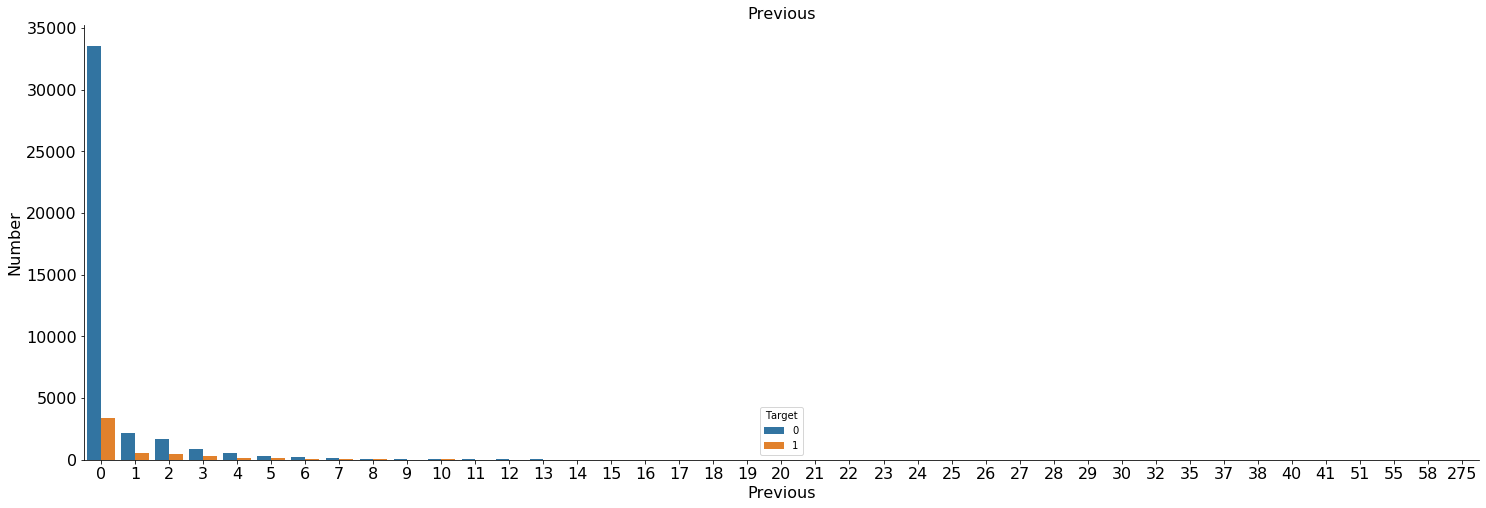

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8)
sns.countplot(raw_df['previous'],hue=raw_df['Target'])
ax.set_xlabel('Previous', fontsize=16)
ax.set_ylabel('Number', fontsize=16)
ax.set_title('Previous', fontsize=16)
ax.tick_params(labelsize=16)
sns.despine()

### Deliverable 2

In [41]:
# Prepre the data for model building
X = raw_df.drop("Target" , axis=1)
y = raw_df.pop("Target")
print("X Shape: ", X.shape)
print("y Shape: ", y.shape)

X Shape:  (45211, 69)
y Shape:  (45211,)


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
print(X_train.shape)
print(X_test.shape)

(31647, 69)
(13564, 69)


### Deliverable 3

### Logistic Regression

In [43]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.005412  0.000017  0.004306 -0.090273  0.024944 -0.310015 -0.503311   

          7         8         9  ...        60        61        62        63  \
0 -0.545235 -0.183657  0.321277  ...  0.383567  1.295698 -0.626512 -0.750501   

         64        65        66        67        68  intercept  
0  0.816037  0.726814  0.069005  2.104801 -0.061774  -1.874712  

[1 rows x 70 columns]


In [44]:
model_score = model.score(X_test, y_test)
print(model_score)

0.9019463285166618


In [45]:
# Confusion matrix
pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'])

Predicted      0    1
Actual               
0          11689  324
1           1006  545

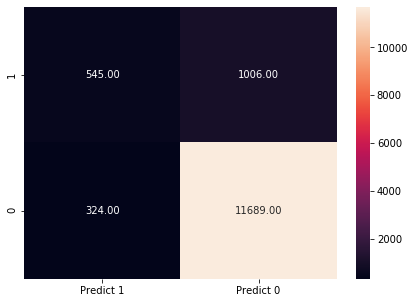

In [46]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='.2f')
# sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )


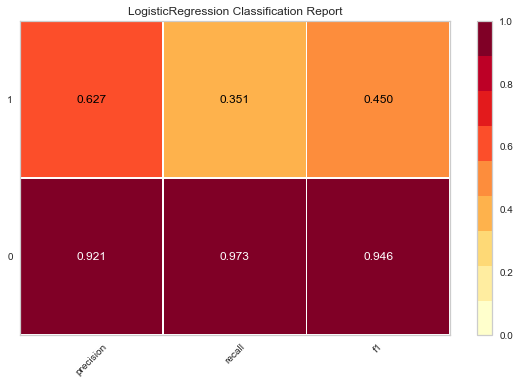

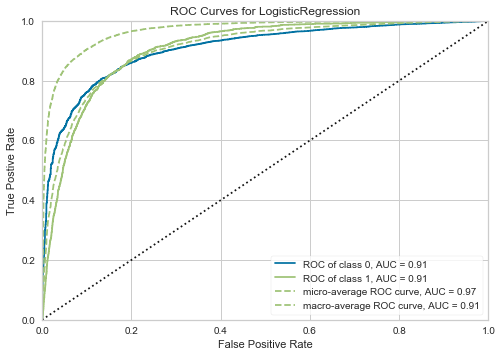

In [47]:
# Visualize model performance with yellowbrick library
from yellowbrick.classifier import ClassificationReport, ROCAUC
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Decision Tree Classifier

In [48]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [49]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8726039516366854


Model is overfit

### Visualizing the tree

In [50]:
train_char_label = ['No', 'Yes']
Data_Tree_File = open('data_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Data_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Data_Tree_File.close()

In [51]:
#Works only if "dot" command works on you machine

retCode = system("dot -Tpng data_tree.dot -o data_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("data_tree.png"))

## Reducing over fitting (Regularization)

In [52]:
#use max_depth=3 to fix overfit
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.9007804847220906
0.9023149513417871


In [53]:
preds_train = dTreeR.predict(X_train)
preds_test = dTreeR.predict(X_test)
acc_dTreeR = accuracy_score(y_test, preds_test)
acc_dTreeR

0.9023149513417871

Training accuracy is almot equal to test accuracy, which indicates the model is not overfit anymore

In [54]:
features = [col for col in raw_df.columns if col != 'Target']

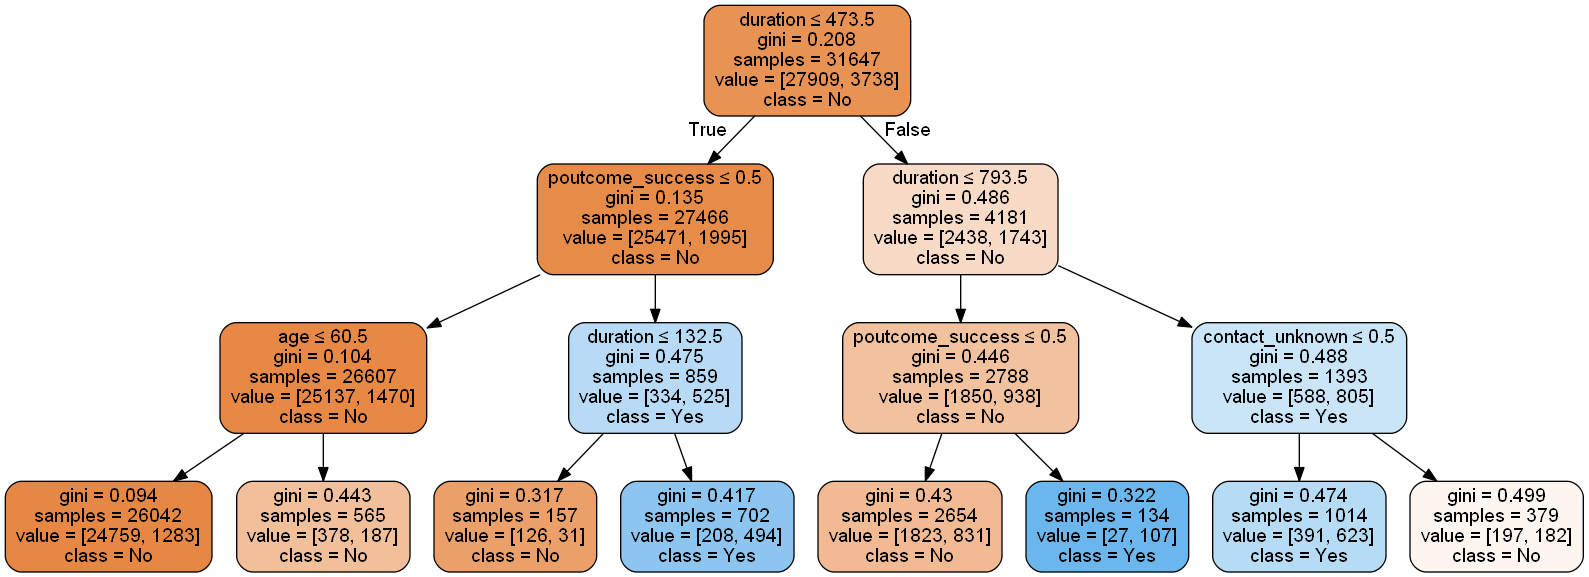

In [55]:
dot_data = StringIO()
export_graphviz(dTreeR, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dTreeR.png')
Image(graph.create_png())

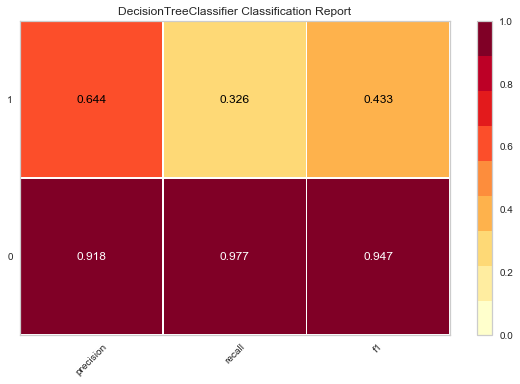

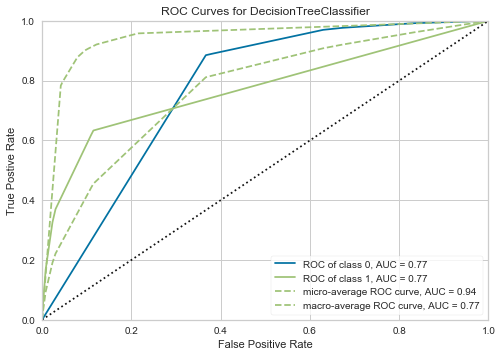

In [56]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(dTreeR)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(dTreeR)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

#### Performance metrics

- __Precision__: Fraction of actuals per label that were correctly classified by the model
- __Recall__: Fraction of predictions that were correctly classified by the model
- __F1-score__: Weighted harmonic mean of the precision and recall. F1-score: 2 * (precision * recall) / (precision + recall)
- __Support__: Number of occurrences of each class in y_test
- __Accuracy__: Fraction of all observations that were correctly classified by the model
- __Macro avg__: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account
- __Micro/weighted avg__: Calculate metrics globally by counting the total true positives, false negatives and false positives
- __AUC Score__: Given a random observation from the dataset that belongs to a class, and a random observation that doesn't belong to a class, the AUC is the perecentage of time that our model will classify which is which correctly

In [57]:
feat_importance = dTreeR.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(features, dTreeR.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
duration          0.606064
poutcome_success  0.336673
age               0.051440
contact_unknown   0.005823
day_21            0.000000
...                    ...
day_7             0.000000
day_8             0.000000
day_9             0.000000
day_10            0.000000
poutcome_unknown  0.000000

[69 rows x 1 columns]

In [58]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_dTreeR})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree  0.902315

### Apply the Random forest model and print the accuracy of Random forest Model

In [59]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [60]:
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

In [61]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree  0.902315
0  Random Forest  0.904674

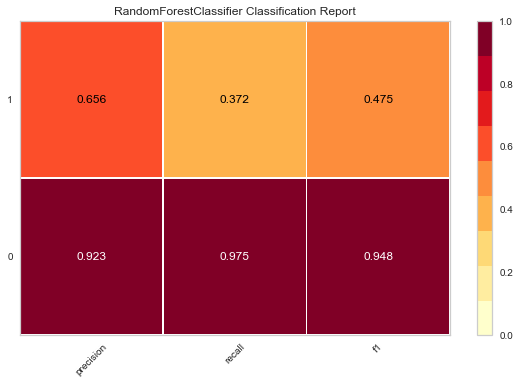

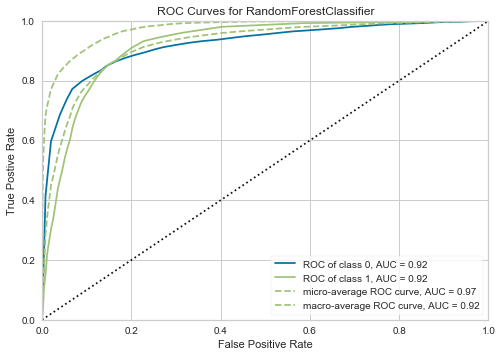

In [62]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [63]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [64]:
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [65]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree  0.902315
0  Random Forest  0.904674
0       Adaboost  0.897965

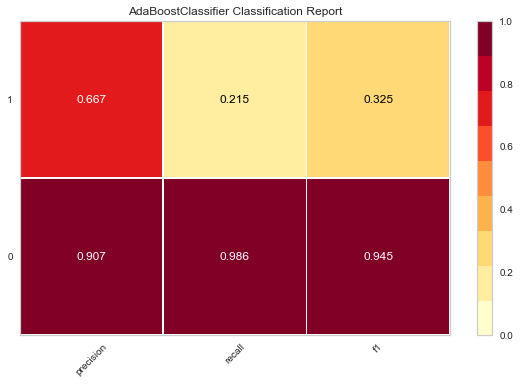

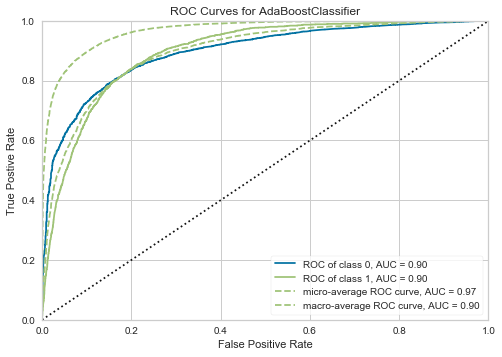

In [66]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Apply Bagging Classifier Algorithm and print the accuracy.

In [67]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [68]:
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

In [69]:
tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree  0.902315
0  Random Forest  0.904674
0       Adaboost  0.897965
0        Bagging  0.904527

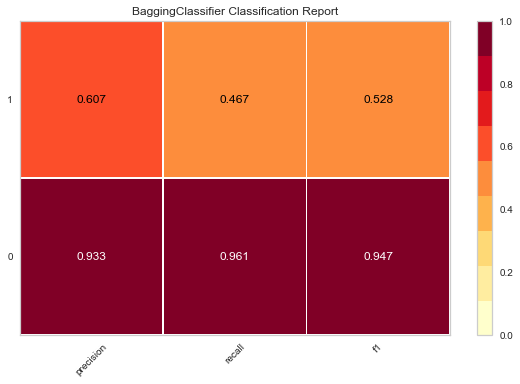

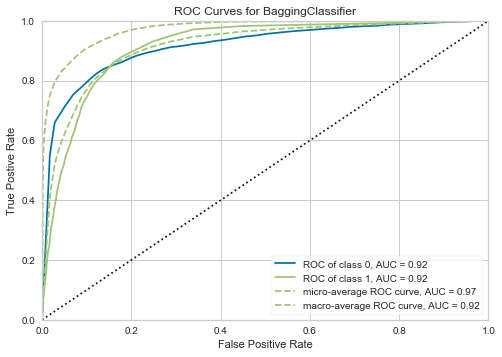

In [70]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

In [72]:
pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

In [73]:
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0   Decision Tree  0.902315
0   Random Forest  0.904674
0        Adaboost  0.897965
0         Bagging  0.904527
0  Gradient Boost  0.904453

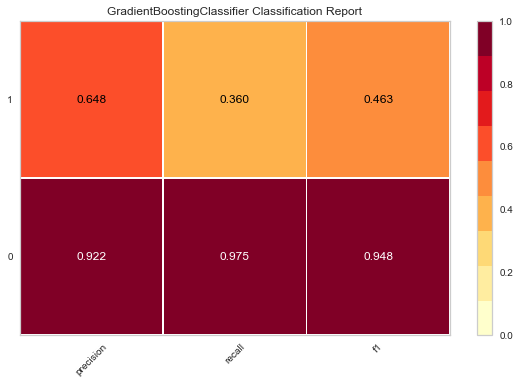

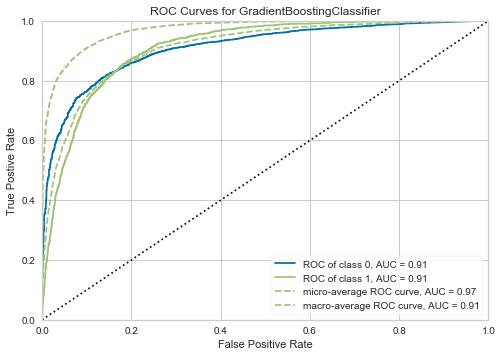

In [74]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

#### For this dataset, Random forest and bagging models give the best results on test predictions